# Tugas Pendat

# Tugas 2 : Menghitung Jarak

In [ ]:
# import library
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
job_data = pd.read_csv('https://raw.githubusercontent.com/Rifqi-05/pendata/main/Job_Placement_Data.csv')
job_data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [ ]:
# Show all columns from dataframe
job_data.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

Seleksi Fitur


*   Gender
*   work experience



In [ ]:
job_data[['gender', 'status']].head(10)

,gender,status
0,M,Placed
1,M,Placed
2,M,Placed
3,M,Not Placed
4,M,Placed
5,M,Not Placed
6,F,Not Placed
7,M,Placed
8,M,Placed
9,M,Not Placed


Change Values to 1/0 Take all values of ‘gender’

If values is Female change to 1

If values is Male to 0

In [ ]:
# Gender code
gender_female = "F"
gender_male = "M"

# binary value
value_one = 1
value_zero = 0

def change_gender_to_binary(gender):
    return value_one if gender == gender_male else value_zero

Change Values to 1/0 Take all values of ‘work experience’

If values is YES change to 1

If values is NO to 0

In [ ]:
# lunch code
status_placed = "Placed"
status_not_placed = "Not placed"

# binary value
value_one = 1
value_zero = 0

def change_lunch_to_binary(status):
    return value_one if status == status_not_placed else value_zero

In [ ]:
# Update all values
job_data["gender"] = job_data["gender"].apply(change_gender_to_binary)
job_data["status"] = job_data["status"].apply(change_status_to_binary)

In [ ]:
job_data[['gender', 'status']].head(10)

,gender,status
0,1,0
1,1,0
2,1,0
3,1,1
4,1,0
5,1,1
6,0,1
7,1,0
8,1,0
9,1,1


In [ ]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

PROBALITY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(job_data, idx, series):
    return job_data.loc[(idx), series]

In [ ]:
def dissimilarity_dataset(job_data, series_index = [], series = []):
    first_series = get_series(job_data, series_index[0], series)
    second_series = get_series(job_data, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [ ]:
dissimilarity_dataset(job_data, [1,2], ["gender", "status"]).T

,1,2
gender,1,1
status,0,0


In [ ]:
job_data.loc[0:4, ["gender", "status"]]

,gender,status
0,1,0
1,1,0
2,1,0
3,1,1
4,1,0


In [ ]:
def count_probality_value(job_data, start_index = 0, last_index = 1):

    PROBALITY_VALUE = {"q" : 0, "r" : 0, "s" : 0, "t" : 0}

    column_range = job_data.shape[1]

    for column in range(column_range):
        for value in PROBALITY_TABLE_VALUE:
            item = list((tuple(job_data.loc[(start_index):(last_index), job_data.columns[column]]) == PROBALITY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    PROBALITY_VALUE["q"] += 1
                if item[1] == "r":
                    PROBALITY_VALUE["r"] += 1
                if item[1] == "s":
                    PROBALITY_VALUE["s"] += 1
                if item[1] == "t":
                    PROBALITY_VALUE["t"] += 1

    return PROBALITY_VALUE

In [ ]:
# dimensi (1,2)
dimensi_1_2 = dissimilarity_dataset(job_data, [1,2], ["gender", "status"])

In [ ]:
probality_d_1_2 = count_probality_value(dimensi_1_2, 1, 2)

In [ ]:
# dimensi (1,3)
dimensi_1_3 = dissimilarity_dataset(job_data, [1,3], ["gender", "status"])

In [ ]:
probality_d_1_3 = count_probality_value(dimensi_1_3, 1, 3)

In [ ]:
# dimensi (1,4)
dimensi_1_4 = dissimilarity_dataset(job_data, [1,4], ["gender", "status"])

In [ ]:
probality_d_1_4 = count_probality_value(dimensi_1_4, 1, 4)

Dissimilarity Binary Symetric Value Formula

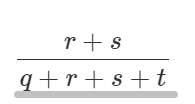

In [ ]:
def dissimilarity_binary_symetric_distance(probality_value):
  
    return (probality_value["r"] + probality_value["s"]) / (probality_value["q"] + probality_value["r"] + probality_value["s"] + probality_value["t"])

In [ ]:
dimensi_1_2 = dissimilarity_binary_symetric_distance(probality_d_1_2)
dimensi_1_3 = dissimilarity_binary_symetric_distance(probality_d_1_3)
dimensi_1_4 = dissimilarity_binary_symetric_distance(probality_d_1_4)

In [ ]:
#d1 dan d2

dimensi_1_2

0.0

In [ ]:
# d1 dan d4

dimensi_1_3

0.5

In [ ]:
# d1 dan d4

dimensi_1_4

0.0

# Tugas 3 : Naive Bayes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Rifqi-05/pendata/main/Iris.csv.csv')
X = dataset.iloc[:,:4].values
y = dataset['Species'].values
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test) 
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica'], dtype='<U15')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm


Accuracy :  0.9666666666666667


array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 10]])

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,Iris-versicolor,Iris-versicolor
1,Iris-virginica,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-virginica,Iris-virginica
5,Iris-virginica,Iris-virginica
6,Iris-virginica,Iris-virginica
7,Iris-versicolor,Iris-versicolor
8,Iris-virginica,Iris-virginica
9,Iris-versicolor,Iris-versicolor


# UTS Pendat

1. Untuk melakukan klasifikasi terlebih dahulu mengaktifkan package yang dibutuhkan untuk melakukan analisis dengan Python yaitu Pandas dan Numpy

In [ ]:
import pandas as pd
import numpy as np

2. Menginput Data

In [ ]:
heart_data= pd.read_csv('https://raw.githubusercontent.com/Rifqi-05/pendata/main/Heart%20Disease%20Prediction.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


3. Menampilkan Informasi data

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


4. Variable Selection

In [ ]:
x = heart_data.drop(["target"], axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y = heart_data["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

5. Spliting Data Train dan Data Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

6. Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

**Klasifikasi dengan KNN**

Klasifikasi pertama akan menggunakan KNN, dengan mengimport fungsi KNeighborsClassifier dari package scikit-learn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Mengaktifkan atau memanggil fungsi klasifikasi KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)

Memasukkan data training pada fungsi klasifikasi KNN

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

Menentukan hasil prediksi dari x_test yang disebut dengan y prediksi

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

Menentukan probabilitas hasil prediksi

In [ ]:
knn.predict_proba(x_test)

array([[0.   , 1.   ],
       [0.875, 0.125],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.125, 0.875],
       [0.625, 0.375],
       [0.25 , 0.75 ],
       [0.25 , 0.75 ],
       [0.875, 0.125],
       [0.625, 0.375],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.625, 0.375],
       [1.   , 0.   ],
       [0.625, 0.375],
       [0.625, 0.375],
       [0.625, 0.375],
       [0.125, 0.875],
       [0.25 , 0.75 ],
       [0.5  , 0.5  ],
       [0.   , 1.   ],
       [0.75 , 0.25 ],
       [0.5  , 0.5  ],
       [0.5  , 0.5  ],
       [0.875, 0.125],
       [0.375, 0.625],
       [1.   , 0.   ],
       [0.5  , 0.5  ],
       [1.   , 0.   ],
       [0.375, 0.625],
       [0.   , 1.   ],
       [0.75 , 0.25 ],
       [0.375, 0.625],
       [0.   , 1.   ],
       [0.125, 0.875],
       [0.375, 0.625],
       [0.   , 1.   ],
       [0.125, 0.875],
       [0.125, 0.875],
       [0.375, 0.625],
       [0.875, 0.125],
       [0. 

Import fungsi confusion matrix dari package scikit-learn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Menampilkan confusion matrix dari hasil prediksi dengan metode KNN

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[25  5]
 [ 7 24]]


Menampilkan laporan klasifikasi yang berisi beberapa nilai dengan menggunakan fungsi ‘classification_report’ yang diimport dari package scikit-learn.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.83      0.77      0.80        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



 Mengetahui nilai akurasi dengan model yang ada maka lakukan perhitungan berikut : (True Positive / True Negative )/ n berdasarkan nilai yang ada pada confusion matrix

In [ ]:
#accuracy = tp+tn/total
accuracy = (24+24)/61
accuracy

0.7868852459016393

**Klasifikasi dengan Metode Naive Bayes**

Klasifikasi selanjutnya menggunakan metode Naive Bayes dengan mengimport fungsi GaussianNB dari package scikit-learn.

In [ ]:
from sklearn.naive_bayes import GaussianNB

Mengaktifkan atau memanggil fungsi klasifikasi Naive Bayes

In [ ]:
modelnb = GaussianNB()

Memasukkan data training pada fungsi klasifikasi Naive Bayes

In [ ]:
nbtrain = modelnb.fit(x_train, y_train)

Selanjutnya menghitung jumlah pada class-class dari model nbtrain

In [ ]:
nbtrain.class_count_

array([108., 134.])

Menentukan hasil prediksi dari x_test yang disebut dengan y prediksi

In [ ]:
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

Menentukan probabilitas hasil prediksi

In [ ]:
nbtrain.predict_proba(x_test)

array([[5.82519301e-04, 9.99417481e-01],
       [9.99240660e-01, 7.59340083e-04],
       [9.99938876e-01, 6.11239119e-05],
       [9.99992659e-01, 7.34091227e-06],
       [3.63340453e-03, 9.96366595e-01],
       [9.99951075e-01, 4.89245485e-05],
       [8.58705904e-03, 9.91412941e-01],
       [5.98824205e-01, 4.01175795e-01],
       [5.96179179e-04, 9.99403821e-01],
       [9.33512783e-01, 6.64872171e-02],
       [9.97942511e-01, 2.05748946e-03],
       [4.57119010e-01, 5.42880990e-01],
       [9.99999986e-01, 1.36201854e-08],
       [9.99995731e-01, 4.26929475e-06],
       [5.16997591e-01, 4.83002409e-01],
       [1.00000000e+00, 5.08299544e-11],
       [9.10170340e-01, 8.98296597e-02],
       [9.86810593e-01, 1.31894074e-02],
       [5.72080552e-01, 4.27919448e-01],
       [2.24337668e-01, 7.75662332e-01],
       [1.35284858e-01, 8.64715142e-01],
       [9.99163391e-01, 8.36609347e-04],
       [4.11790193e-05, 9.99958821e-01],
       [9.82142823e-01, 1.78571775e-02],
       [9.874890

Import fungsi confusion matrix dari package scikit-learn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Menampilkan confusion matrix dari hasil prediksi dengan metode Naive Bayes

In [ ]:
confusion_matrix(y_test, y_pred)

array([[27,  3],
       [ 7, 24]])

Menampilkan laporan klasifikasi yang berisi beberapa nilai dengan menggunakan fungsi ‘classification_report’ yang diimport dari package scikit-learn.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.89      0.77      0.83        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Mengetahui nilai akurasi dengan model yang ada maka lakukan perhitungan berikut : (True Positive / True Negative )/ n berdasarkan nilai yang ada pada confusion matrix

In [ ]:
#accuracy = tp+tn/total
accuracy = (27+24)/61
accuracy

0.8360655737704918